In [3]:
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'C:\\Users\\matteosoo\\downloads\\dogs-vs-cats\\kaggle_original_data'

# The directory where we will
# store our smaller dataset
base_dir = 'C:\\Users\\matteosoo\\downloads\\dogs-vs-cats\\cats_and_dogs_small'
# os.mkdir(base_dir)

In [4]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [5]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [7]:
import torch
import torch.nn as nn
from torchvision import datasets ,models,transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim import lr_scheduler
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [9]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32
# learning rate
LR = 0.01

In [10]:
# convert data to a normalized torch.FloatTensor
train_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

In [11]:
# choose the training and test datasets
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_data = datasets.ImageFolder(validation_dir,transform=valid_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

In [12]:
print(train_data.class_to_idx)
print(valid_data.class_to_idx)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [13]:
# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers,shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,  num_workers=num_workers,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,  num_workers=num_workers)

In [14]:
images,labels=next(iter(train_loader))
images.shape,labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
classes = ['cat','dog']
mean , std = torch.tensor([0.485, 0.456, 0.406]),torch.tensor([0.229, 0.224, 0.225])


def denormalize(image):
    image = transforms.Normalize(-mean/std,1/std)(image) #denormalize
    image = image.permute(1,2,0) #Changing from 3x224x224 to 224x224x3
    image = torch.clamp(image,0,1)
    return image

# helper function to un-normalize and display an image
def imshow(img):
    img = denormalize(img) 
    plt.imshow(img)

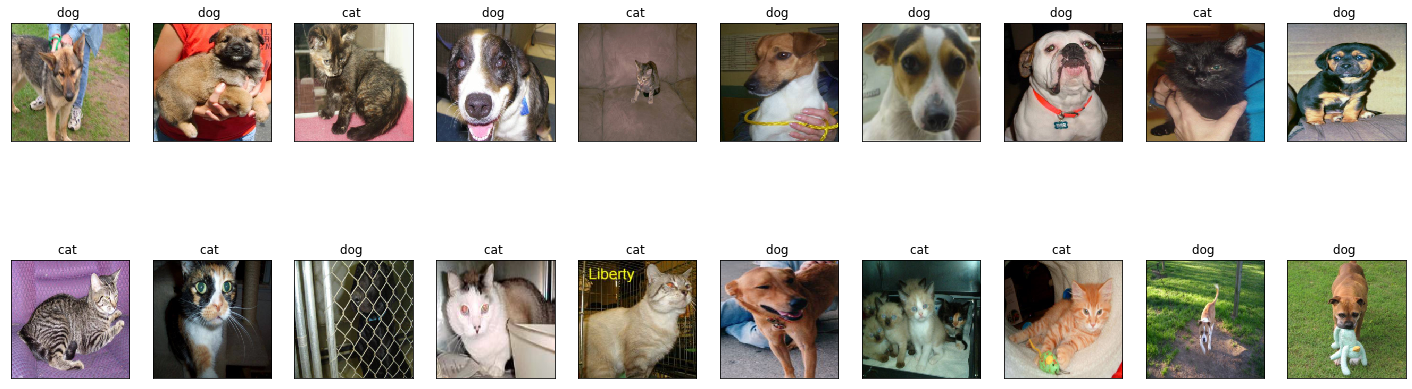

In [16]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
 # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 8))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ".format( classes[labels[idx]]))

# 構建CNN網絡

In [17]:
# Create CNN Model
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        # Convolution 1 , input_shape=(3,224,224)
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0) #output_shape=(16,220,220) #(224-5+1)/1 #(weigh-kernel+1)/stride 無條件進位
        self.relu1 = nn.ReLU() # activation
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2) #output_shape=(16,110,110) #(220/2)
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0) #output_shape=(32,106,106)
        self.relu2 = nn.ReLU() # activation
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2) #output_shape=(32,53,53)
        # Convolution 3
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=0) #output_shape=(16,51,51)
        self.relu3 = nn.ReLU() # activation
        # Max pool 3
        self.maxpool3 = nn.MaxPool2d(kernel_size=2) #output_shape=(16,25,25)
        # Convolution 4
        self.cnn4 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding=0) #output_shape=(8,23,23)
        self.relu4 = nn.ReLU() # activation
        # Max pool 4
        self.maxpool4 = nn.MaxPool2d(kernel_size=2) #output_shape=(8,11,11)
        # Fully connected 1 ,#input_shape=(8*12*12)
        self.fc1 = nn.Linear(8 * 11 * 11, 512) 
        self.relu5 = nn.ReLU() # activation
        self.fc2 = nn.Linear(512, 2) 
        self.output = nn.Softmax(dim=1)
        
    
    def forward(self, x):
        out = self.cnn1(x) # Convolution 1
        out = self.relu1(out)
        out = self.maxpool1(out)# Max pool 1
        out = self.cnn2(out) # Convolution 2
        out = self.relu2(out) 
        out = self.maxpool2(out) # Max pool 2
        out = self.cnn3(out) # Convolution 3
        out = self.relu3(out)
        out = self.maxpool3(out) # Max pool 3
        out = self.cnn4(out) # Convolution 4
        out = self.relu4(out)
        out = self.maxpool4(out) # Max pool 4
        out = out.view(out.size(0), -1) # last CNN faltten con. Linear NN
        out = self.fc1(out) # Linear function (readout)
        out = self.fc2(out)
        out = self.output(out)

        return out

In [18]:
model = CNN_Model()
from torchsummary import summary
summary(model.cuda(), (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 220, 220]           1,216
              ReLU-2         [-1, 16, 220, 220]               0
         MaxPool2d-3         [-1, 16, 110, 110]               0
            Conv2d-4         [-1, 32, 106, 106]          12,832
              ReLU-5         [-1, 32, 106, 106]               0
         MaxPool2d-6           [-1, 32, 53, 53]               0
            Conv2d-7           [-1, 16, 51, 51]           4,624
              ReLU-8           [-1, 16, 51, 51]               0
         MaxPool2d-9           [-1, 16, 25, 25]               0
           Conv2d-10            [-1, 8, 23, 23]           1,160
             ReLU-11            [-1, 8, 23, 23]               0
        MaxPool2d-12            [-1, 8, 11, 11]               0
           Linear-13                  [-1, 512]         496,128
           Linear-14                   

# 訓練模型

In [23]:
from tqdm.notebook import tqdm as tqdm

In [25]:
from torch import optim
optimizer = torch.optim.RMSprop(model.parameters(), lr=LR, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

In [27]:
criterion = nn.CrossEntropyLoss()

In [28]:
if train_on_gpu:
    model.cuda()
# number of epochs to train the model
n_epochs = 50

valid_loss_min = np.Inf # track change in validation loss

#train_losses,valid_losses=[],[]

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    print('running epoch: {}'.format(epoch))
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in tqdm(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in tqdm(valid_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    #train_losses.append(train_loss/len(train_loader.dataset))
    #valid_losses.append(valid_loss.item()/len(valid_loader.dataset)
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('\tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_CNN.pth')
        valid_loss_min = valid_loss

running epoch: 1



	Training Loss: 0.813803 	Validation Loss: 0.813262
Validation loss decreased (inf --> 0.813262).  Saving model ...
running epoch: 2



	Training Loss: 0.813262 	Validation Loss: 0.813262
running epoch: 3



	Training Loss: 0.813261 	Validation Loss: 0.813261
Validation loss decreased (0.813262 --> 0.813261).  Saving model ...
running epoch: 4



	Training Loss: 0.813262 	Validation Loss: 0.813261
Validation loss decreased (0.813261 --> 0.813261).  Saving model ...
running epoch: 5



	Training Loss: 0.813261 	Validation Loss: 0.813261
Validation loss decreased (0.813261 --> 0.813261).  Saving model ...
running epoch: 6



	Training Loss: 0.813262 	Validation Loss: 0.813262
running epoch: 7



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 8



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 9



	Training Loss: 0.813261 	Validation Loss: 0.813262
running epoch: 10



	Training Loss: 0.813262 	Validation Loss: 0.813261
running epoch: 11



	Training Loss: 0.813262 	Validation Loss: 0.813262
running epoch: 12



	Training Loss: 0.813262 	Validation Loss: 0.813262
running epoch: 13



	Training Loss: 0.813261 	Validation Loss: 0.813261
Validation loss decreased (0.813261 --> 0.813261).  Saving model ...
running epoch: 14



	Training Loss: 0.813261 	Validation Loss: 0.813262
running epoch: 15



	Training Loss: 0.813262 	Validation Loss: 0.813261
running epoch: 16



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 17



	Training Loss: 0.813261 	Validation Loss: 0.813262
running epoch: 18



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 19



	Training Loss: 0.813261 	Validation Loss: 0.813262
running epoch: 20



	Training Loss: 0.813261 	Validation Loss: 0.813262
running epoch: 21



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 22



	Training Loss: 0.813261 	Validation Loss: 0.813262
running epoch: 23



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 24



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 25



	Training Loss: 0.813262 	Validation Loss: 0.813262
running epoch: 26



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 27



	Training Loss: 0.813261 	Validation Loss: 0.813261
Validation loss decreased (0.813261 --> 0.813261).  Saving model ...
running epoch: 28



	Training Loss: 0.813261 	Validation Loss: 0.813262
running epoch: 29



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 30



	Training Loss: 0.813262 	Validation Loss: 0.813261
running epoch: 31



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 32



	Training Loss: 0.813261 	Validation Loss: 0.813262
running epoch: 33



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 34



	Training Loss: 0.813262 	Validation Loss: 0.813261
running epoch: 35



	Training Loss: 0.813262 	Validation Loss: 0.813262
running epoch: 36



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 37



	Training Loss: 0.813261 	Validation Loss: 0.813261
Validation loss decreased (0.813261 --> 0.813261).  Saving model ...
running epoch: 38



	Training Loss: 0.813262 	Validation Loss: 0.813261
running epoch: 39



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 40



	Training Loss: 0.813261 	Validation Loss: 0.813261
Validation loss decreased (0.813261 --> 0.813261).  Saving model ...
running epoch: 41



	Training Loss: 0.813261 	Validation Loss: 0.813261
Validation loss decreased (0.813261 --> 0.813261).  Saving model ...
running epoch: 42



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 43



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 44



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 45



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 46



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 47



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 48



	Training Loss: 0.813262 	Validation Loss: 0.813261
running epoch: 49



	Training Loss: 0.813261 	Validation Loss: 0.813261
running epoch: 50



	Training Loss: 0.813262 	Validation Loss: 0.813262


# 評估並測試 model

In [29]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}'.format(test_loss))

    print('Test Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [30]:
use_cuda = torch.cuda.is_available()
model.cuda()
test(test_loader, model, criterion, use_cuda)

Test Loss: 0.824980
Test Accuracy: 50% (500/1000)
